# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

# Determine if ML is an appropriate solution
In this case, machine learning is appropriate because we are dealing with a large dataset of historical flight and weather data that contains patterns and relationships that may not be immediately visible. ML can help in discovering these patterns to predict whether a flight will be delayed based on weather conditions. Additionally, ML models can learn from the past data and generalize to unseen situations, which is key for making real-time predictions for future flights.


### 2. Formulate the business problem, success metrics, and desired ML output.

# Business Problem, Success Metrics, and Desired ML Output
The business problem is to predict whether a flight will be delayed based on weather conditions and other relevant factors, which can improve the customer experience on the travel booking website by providing this information before booking. 

The success metric for this project is to achieve a high accuracy of predictions, but with a focus on minimizing false negatives (flights predicted to be on-time but are actually delayed). Therefore, metrics like precision, recall, and F1-score will be used to measure model performance.

The desired machine learning output is a classification model that can accurately predict whether a flight will be delayed or not, based on features like weather, airport, date, time, and carrier.


### 3. Identify the type of ML problem you’re dealing with.

# Type of ML Problem
This is a **supervised learning** problem, specifically a **binary classification** problem, as we are trying to predict one of two outcomes: whether a flight will be delayed or not. The target variable is categorical (Delayed or Not Delayed).


### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [60]:
pip install pathlib2

Note: you may need to restart the kernel to use updated packages.


In [61]:
import os
from pathlib2 import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# <please add any other library or function you are aiming to import here>


# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [64]:
# download the files

# <note: make them all relative, absolute path is not accepted>
#zip_path = 'path to the zip files'
#base_path = 'the folder that contains the whole project (data and code)'
#csv_base_path = 'path to where you want the zip files extracted'

#!mkdir -p {csv_base_path}


import os
from zipfile import ZipFile

# Define relative paths
zip_path = 'data_compressed.zip'  # Zip file is in the same directory as the notebook
csv_base_path = 'extracted_data'  # Folder to extract the data

# Create the extraction folder if it doesn't exist
if not os.path.exists(csv_base_path):
    os.makedirs(csv_base_path)

# Extract the zip file
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(csv_base_path)

print(f"All files extracted to {csv_base_path}")



All files extracted to extracted_data


In [66]:
# How many zip files do we have? write a code to answer it.

# Define the directory where the zip files are located
directory = '.'  # Current directory

# Count the number of zip files
zip_file_count = len([file for file in os.listdir(directory) if file.endswith('.zip')])

print(f"There are {zip_file_count} zip file(s) in the directory '{directory}'.")

# Define the directory where the extracted files are located
extracted_directory = 'extracted_data'  # Folder containing extracted files

# Count the number of zip files in the extracted_data folder
zip_file_count_extracted = len([file for file in os.listdir(extracted_directory) if file.endswith('.zip')])

print(f"There are {zip_file_count_extracted} zip file(s) in the '{extracted_directory}' folder.")



There are 1 zip file(s) in the directory '.'.
There are 60 zip file(s) in the 'extracted_data' folder.


#### Extract CSV files from ZIP files

In [68]:
'''def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """

    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f'Extracting {zipFile_name} ') 
            z.extractall(path=file_path) 
    except:
        print(f'zip2csv failed for {zipFile_name}')

for file in zip_files:
    zip2csv(file, csv_base_path)

print("Files Extracted")'''
import os
from zipfile import ZipFile

# Function to extract CSV from zip files
def zip2csv(zipFile_name, file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """
    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f'Extracting {zipFile_name}...') 
            z.extractall(path=file_path) 
    except Exception as e:
        print(f'zip2csv failed for {zipFile_name}: {e}')

# Define the path where the zip files are located
zip_directory = 'extracted_data'  # Folder containing extracted zip files

# Get the list of zip files in the extracted_data directory
zip_files = [os.path.join(zip_directory, file) for file in os.listdir(zip_directory) if file.endswith('.zip')]

# Define the path to store extracted CSV files
csv_base_path = 'extracted_data_csv'  # New folder for extracted CSVs

# Ensure the extraction path exists
if not os.path.exists(csv_base_path):
    os.makedirs(csv_base_path)

# Extract CSV files from each zip file found in the extracted_data folder
for file in zip_files:
    zip2csv(file, csv_base_path)

print("All CSV files extracted from zip files in 'extracted_data'.")


Extracting extracted_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip...
Extracting extracted_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip...
Extracting extracted_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip...
Extracting extracted_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip...
Extracting extracted_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip...
Extracting extracted_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip...
Extracting extracted_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip...
Extracting extracted_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5.zip...
Extracting extracted_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_6.zip...
Extracting extracted_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_7.zip...
Extract

In [70]:
# How many csv files have we extracted? write a code to answer it.

# Define the directory where the CSV files are located
csv_directory = 'extracted_data_csv'  # Folder containing extracted CSV files

# Count the number of CSV files in the directory
csv_file_count = len([file for file in os.listdir(csv_directory) if file.endswith('.csv')])

print(f"There are {csv_file_count} CSV file(s) extracted in the '{csv_directory}' folder.")



There are 61 CSV file(s) extracted in the 'extracted_data_csv' folder.


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [72]:
'''from IPython.display import IFrame

IFrame(src=os.path.relpath(f"{csv_base_path}readme.html"), width=1000, height=600)'''
from IPython.display import IFrame

# Define the path to the HTML file you want to display
html_file_path = os.path.join('extracted_data_csv', 'readme.html')  # Adjust the filename if necessary

# Display the HTML file using IFrame
IFrame(src=os.path.relpath(html_file_path), width=1000, height=600)


#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [74]:
#df_temp = pd.read_csv(<CODE> # **ENTER YOUR CODE HERE**

# Define the path to the CSV file
csv_file_path = os.path.join('extracted_data_csv', 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv')

# Load the CSV file into a DataFrame
df_temp = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame to understand the data
print(df_temp.head())


   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2018        3      9           3          1  2018-09-03                9E   
1  2018        3      9           9          7  2018-09-09                9E   
2  2018        3      9          10          1  2018-09-10                9E   
3  2018        3      9          13          4  2018-09-13                9E   
4  2018        3      9          14          5  2018-09-14                9E   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0                     20363                          9E      N908XJ  ...   
1                     20363                          9E      N315PQ  ...   
2                     20363                          9E      N582CA  ...   
3                     20363                          9E      N292PQ  ...   
4                     20363                          9E      N600LR  ...   

   Div4TailNum  Div5Airport  Div5AirportID  Div5AirportSeqID D

**Question**: Print the row and column length in the dataset, and print the column names.

In [24]:
'''df_shape = # **ENTER YOUR CODE HERE**
print(f'Rows and columns in one csv file is {df_shape}')'''
# Get the shape of the DataFrame
df_shape = df_temp.shape

# Print the shape and column names
print(f'Rows and columns in one csv file are {df_shape}')
print('Column names:', df_temp.columns.tolist())

Rows and columns in one csv file are (585749, 110)
Column names: ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'DOT_ID_Reporting_Airline', 'IATA_CODE_Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'Sec

**Question**: Print the first 10 rows of the dataset.  

In [28]:
# Enter your code here
# Print the first 10 rows of the dataset
print(df_temp.head(10))

   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2018        3      9           3          1  2018-09-03                9E   
1  2018        3      9           9          7  2018-09-09                9E   
2  2018        3      9          10          1  2018-09-10                9E   
3  2018        3      9          13          4  2018-09-13                9E   
4  2018        3      9          14          5  2018-09-14                9E   
5  2018        3      9          16          7  2018-09-16                9E   
6  2018        3      9          17          1  2018-09-17                9E   
7  2018        3      9          20          4  2018-09-20                9E   
8  2018        3      9          21          5  2018-09-21                9E   
9  2018        3      9          23          7  2018-09-23                9E   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0                     20363                

**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [31]:
'''print(f'The column names are :')
print('#########')
for col in <CODE>:# **ENTER YOUR CODE HERE**
    print(col)'''
# Print the column names
print(f'The column names are:')
print('#########')

# Iterate through the columns and print each one
for col in df_temp.columns:
    print(col)


The column names are:
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1T

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [34]:
# Enter your code here
# Find and print all column names that contain the word 'Del'
delay_columns = [col for col in df_temp.columns if 'Del' in col]

print(f'The columns containing "Del" are:')
print('#########')
for col in delay_columns:
    print(col)


The columns containing "Del" are:
#########
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
DivArrDelay


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [37]:
# to answer above questions, complete the following code
'''print("The #rows and #columns are ", <CODE> , " and ", <CODE>)
print("The years in this dataset are: ", <CODE>)
print("The months covered in this dataset are: ", <CODE>)
print("The date range for data is :" , min(<CODE>), " to ", max(<CODE>))
print("The airlines covered in this dataset are: ", list(<CODE>))
print("The Origin airports covered are: ", list(<CODE>))
print("The Destination airports covered are: ", list(<CODE>))'''
# 1. How many rows and columns does the dataset have?
print("The #rows and #columns are ", df_temp.shape[0], " and ", df_temp.shape[1])

# 2. How many years are included in the dataset?
years_in_dataset = df_temp['Year'].unique()  # Assuming there's a 'Year' column
print("The years in this dataset are: ", years_in_dataset)

# 3. What is the date range for the dataset?
print("The date range for data is :", min(df_temp['FlightDate']), " to ", max(df_temp['FlightDate']))

# 4. Which airlines are included in the dataset?
airlines_covered = df_temp['Reporting_Airline'].unique()  # Assuming there's an 'Airline' column
print("The airlines covered in this dataset are: ", list(airlines_covered))

# 5. Which origin and destination airports are covered?
origin_airports = df_temp['Origin'].unique()  # Assuming there's an 'Origin' column
destination_airports = df_temp['Dest'].unique()  # Assuming there's a 'Destination' column
print("The Origin airports covered are: ", list(origin_airports))
print("The Destination airports covered are: ", list(destination_airports))


The #rows and #columns are  585749  and  110
The years in this dataset are:  [2018]
The date range for data is : 2018-09-01  to  2018-09-30
The airlines covered in this dataset are:  ['9E', 'B6', 'WN', 'YV', 'YX', 'EV', 'AA', 'AS', 'DL', 'HA', 'UA', 'F9', 'G4', 'MQ', 'NK', 'OH', 'OO']
The Origin airports covered are:  ['DFW', 'LGA', 'MSN', 'MSP', 'ATL', 'BDL', 'VLD', 'JFK', 'RDU', 'CHS', 'DTW', 'GRB', 'PVD', 'SHV', 'FNT', 'PIT', 'RIC', 'RST', 'RSW', 'CVG', 'LIT', 'ORD', 'JAX', 'TRI', 'BOS', 'CWA', 'DCA', 'CHO', 'AVP', 'IND', 'GRR', 'BTR', 'MEM', 'TUL', 'CLE', 'STL', 'BTV', 'OMA', 'MGM', 'TVC', 'SAV', 'GSP', 'EWR', 'OAJ', 'BNA', 'MCI', 'TLH', 'ROC', 'LEX', 'PWM', 'BUF', 'AGS', 'CLT', 'GSO', 'BWI', 'SAT', 'PHL', 'TYS', 'ACK', 'DSM', 'GNV', 'AVL', 'BGR', 'MHT', 'ILM', 'MOT', 'IAH', 'SBN', 'SYR', 'ORF', 'MKE', 'XNA', 'MSY', 'PBI', 'ABE', 'HPN', 'EVV', 'ALB', 'LNK', 'AUS', 'PHF', 'CHA', 'GTR', 'BMI', 'BQK', 'CID', 'CAK', 'ATW', 'ABY', 'CAE', 'SRQ', 'MLI', 'BHM', 'IAD', 'CSG', 'CMH', 'MCO', 

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [40]:
'''counts = pd.DataFrame({'Origin':<CODE>, 'Destination':<CODE>})
counts'''
# Count the occurrences of each origin airport
origin_counts = df_temp['Origin'].value_counts()

# Count the occurrences of each destination airport
destination_counts = df_temp['Dest'].value_counts()  # Assuming 'Dest' is the correct column name

# Create a DataFrame to store the counts
counts = pd.DataFrame({'Origin': origin_counts, 'Destination': destination_counts}).fillna(0)

# Display the counts
counts


,Origin,Destination
ABE,303,303
ABI,169,169
ABQ,2077,2076
ABR,60,60
ABY,79,79
...,...,...
WRG,60,60
WYS,52,52
XNA,1004,1004
YAK,60,60


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [43]:
#counts.sort_values(by=<CODE>,ascending=False).head(15 )# Enter your code here
# Sort and get the top 15 origin airports based on number of flights
top_origin_airports = counts['Origin'].sort_values(ascending=False).head(15)

# Sort and get the top 15 destination airports based on number of flights
top_destination_airports = counts['Destination'].sort_values(ascending=False).head(15)

# Print the results
print("Top 15 Origin Airports based on number of flights:")
print(top_origin_airports)

print("\nTop 15 Destination Airports based on number of flights:")
print(top_destination_airports)


Top 15 Origin Airports based on number of flights:
ATL    31525
ORD    28257
DFW    22802
DEN    19807
CLT    19655
LAX    17875
SFO    14332
IAH    14210
LGA    13850
MSP    13349
LAS    13318
PHX    13126
DTW    12725
BOS    12223
SEA    11872
Name: Origin, dtype: int64

Top 15 Destination Airports based on number of flights:
ATL    31521
ORD    28250
DFW    22795
DEN    19807
CLT    19654
LAX    17873
SFO    14348
IAH    14203
LGA    13850
MSP    13347
LAS    13322
PHX    13128
DTW    12724
BOS    12227
SEA    11877
Name: Destination, dtype: int64


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

# Enter your answer here
Yes, given all the information about a flight trip, we can predict if it would be delayed or not using a machine learning models.

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [76]:
'''def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine csv files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    """
    # Create an empty dataframe
    df = # Enter your code here 
    
    #<complete the code of this function>'''
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals):
    """
    Combine csv files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    """
    # Create an empty dataframe
    combined_df = pd.DataFrame()

    # Loop through each csv file
    for file in csv_files:
        # Read the CSV file into a dataframe
        df = pd.read_csv(file)

        # Filter the dataframe based on filter_cols
        df_filtered = df[filter_cols]

        # Keep only the subset_vals in each of the subset_cols
        for col, vals in zip(subset_cols, subset_vals):
            df_filtered = df_filtered[df_filtered[col].isin(vals)]
        
        # Concatenate the dataframe with the combined dataframe
        combined_df = pd.concat([combined_df, df_filtered], ignore_index=True)

    return combined_df

# Define your csv_files list (example with placeholder names)
csv_files = [os.path.join('extracted_data_csv', file) for file in os.listdir('extracted_data_csv') if file.endswith('.csv')]

# Define the columns for prediction
filter_cols = [
    'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
    'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
    'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
    'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'AirTime'
]

# Subset columns and values as defined
subset_cols = ['Origin', 'Dest', 'Reporting_Airline']
subset_vals = [
    ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'],  # Origin
    ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'],  # Dest
    ['UA', 'OO', 'WN', 'AA', 'DL']  # Reporting Airline
]

# Call the function to combine the CSV files
combined_df = combine_csv(csv_files, filter_cols, subset_cols, subset_vals)

# Display the shape and first few rows of the combined DataFrame
print(f'Combined DataFrame shape: {combined_df.shape}')
print(combined_df.head())

combined_orgi = combined_df


Combined DataFrame shape: (3316260, 20)
   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2014        1      1          26          7  2014-01-26                DL   
1  2014        1      1          26          7  2014-01-26                DL   
2  2014        1      1          26          7  2014-01-26                DL   
3  2014        1      1          26          7  2014-01-26                DL   
4  2014        1      1          26          7  2014-01-26                DL   

  Origin OriginState Dest DestState  CRSDepTime  Cancelled  Diverted  \
0    ATL          GA  IAH        TX        2145        0.0       0.0   
1    DFW          TX  ATL        GA         945        0.0       0.0   
2    ATL          GA  DEN        CO        1855        0.0       0.0   
3    ATL          GA  PHX        AZ        1634        0.0       0.0   
4    PHX          AZ  ATL        GA         700        0.0       0.0   

   Distance  DistanceGroup  ArrDelay  ArrDelay

In [121]:
#cols is the list of columns to predict Arrival Delay 
'''cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]'''

"cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',\n        'Reporting_Airline','Origin','OriginState','Dest','DestState',\n        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',\n        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']\n\nsubset_cols = ['Origin', 'Dest', 'Reporting_Airline']\n\n# subset_vals is a list collection of the top origin and destination airports and top 5 airlines\nsubset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], \n               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], \n               ['UA', 'OO', 'WN', 'AA', 'DL']]"

In [78]:
# Create a copy of the dataframe to avoid SettingWithCopyWarning
#df_combined_copy = combined_df.copy()

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [123]:
'''start = time.time()

combined_csv_filename = f"{base_path}combined_files.csv"

# < write code to call the combined_csv function>

print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')'''

# Start the timer
start = time.time()

# Define the path to save the combined CSV file
combined_csv_filename = os.path.join(csv_base_path, 'combined_files.csv')

# Call the combine_csv function
combined_df = combine_csv(csv_files, filter_cols, subset_cols, subset_vals)

# Save the combined DataFrame to a CSV file
combined_df.to_csv(combined_csv_filename, index=False)

# Print the time taken to merge the CSV files
print(f"CSV's merged in {round((time.time() - start)/60, 2)} minutes")


CSV's merged in 5.77 minutes


#### Load dataset

Load the combined dataset.

In [125]:
#data = pd.read_csv(<CODE>)# Enter your code here to read the combined csv file.
# Define the path to the combined CSV file
combined_csv_filename = os.path.join(csv_base_path, 'combined_files.csv')

# Load the combined dataset
data = pd.read_csv(combined_csv_filename)

# Display the first few rows and the shape of the dataset to verify it loaded correctly
print(f'Dataset loaded with shape: {data.shape}')
print(data.head())


Dataset loaded with shape: (3316260, 20)
   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2014        1      1          26          7  2014-01-26                DL   
1  2014        1      1          26          7  2014-01-26                DL   
2  2014        1      1          26          7  2014-01-26                DL   
3  2014        1      1          26          7  2014-01-26                DL   
4  2014        1      1          26          7  2014-01-26                DL   

  Origin OriginState Dest DestState  CRSDepTime  Cancelled  Diverted  \
0    ATL          GA  IAH        TX        2145        0.0       0.0   
1    DFW          TX  ATL        GA         945        0.0       0.0   
2    ATL          GA  DEN        CO        1855        0.0       0.0   
3    ATL          GA  PHX        AZ        1634        0.0       0.0   
4    PHX          AZ  ATL        GA         700        0.0       0.0   

   Distance  DistanceGroup  ArrDelay  ArrDela

Print the first 5 records.

In [68]:
# Enter your code here 
# Print the first 5 records of the dataset
print(data.head(5))


   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2014        1      1          26          7  2014-01-26                DL   
1  2014        1      1          26          7  2014-01-26                DL   
2  2014        1      1          26          7  2014-01-26                DL   
3  2014        1      1          26          7  2014-01-26                DL   
4  2014        1      1          26          7  2014-01-26                DL   

  Origin OriginState Dest DestState  CRSDepTime  Cancelled  Diverted  \
0    ATL          GA  IAH        TX        2145        0.0       0.0   
1    DFW          TX  ATL        GA         945        0.0       0.0   
2    ATL          GA  DEN        CO        1855        0.0       0.0   
3    ATL          GA  PHX        AZ        1634        0.0       0.0   
4    PHX          AZ  ATL        GA         700        0.0       0.0   

   Distance  DistanceGroup  ArrDelay  ArrDelayMinutes  ArrDel15  AirTime  
0     689.0

Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [70]:
# to answer above questions, complete the following code
'''print("The #rows and #columns are ", <CODE> , " and ", <CODE>)
print("The years in this dataset are: ", list(<CODE>))
print("The months covered in this dataset are: ", sorted(list(<CODE>)))
print("The date range for data is :" , min(<CODE>), " to ", max(<CODE>))
print("The airlines covered in this dataset are: ", list(<CODE>))
print("The Origin airports covered are: ", list(<CODE>))
print("The Destination airports covered are: ", list(<CODE>))'''
# 1. How many rows and columns does the dataset have?
print("The #rows and #columns are ", data.shape[0], " and ", data.shape[1])

# 2. How many years are included in the dataset?
years_in_dataset = data['Year'].unique()  # Get unique years
print("The years in this dataset are: ", list(years_in_dataset))

# 3. What is the date range for the dataset?
print("The date range for data is :" , min(data['FlightDate']), " to ", max(data['FlightDate']))

# 4. Which airlines are included in the dataset?
airlines_covered = data['Reporting_Airline'].unique()  # Get unique airlines
print("The airlines covered in this dataset are: ", list(airlines_covered))

# 5. Which origin and destination airports are covered?
origin_airports = data['Origin'].unique()  # Get unique origin airports
destination_airports = data['Dest'].unique()  # Get unique destination airports
print("The Origin airports covered are: ", list(origin_airports))
print("The Destination airports covered are: ", list(destination_airports))


The #rows and #columns are  1658130  and  20
The years in this dataset are:  [2014, 2015, 2016, 2017, 2018]
The date range for data is : 2014-01-01  to  2018-12-31
The airlines covered in this dataset are:  ['DL', 'OO', 'WN', 'UA', 'AA']
The Origin airports covered are:  ['ATL', 'DFW', 'PHX', 'DEN', 'IAH', 'CLT', 'SFO', 'LAX', 'ORD']
The Destination airports covered are:  ['IAH', 'ATL', 'DEN', 'PHX', 'CLT', 'LAX', 'DFW', 'SFO', 'ORD']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [128]:
#data.rename(columns=<CODE>, inplace=True)
# Enter your code here
# Rename the column from 'ArrDel15' to 'is_delay'
data.rename(columns={'ArrDel15': 'is_delay'}, inplace=True)
# Print the updated column names to verify the change
print(data.columns.tolist())


['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState', 'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup', 'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime']


Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [234]:
# Enter your code here
# Check for null values across all columns
null_counts = data.isnull().sum(axis=0)

# Print the count of null values for each column
print("Null values in each column:")
print(null_counts[null_counts > 0])  # Only display columns with null values


Null values in each column:
ArrDelay           22540
ArrDelayMinutes    22540
is_delay           22540
AirTime            22540
dtype: int64


The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [130]:
### Remove null columns
#data = # Enter your code here
# Remove rows with null values in 'ArrDelay' and 'AirTime' columns
data = data[~data['ArrDelay'].isnull() & ~data['AirTime'].isnull()]

# Verify the shape of the DataFrame after removing nulls
print(f'Data shape after removing rows with missing values: {data.shape}')


Data shape after removing rows with missing values: (3271180, 20)


Get the hour of the day in 24-hour time format from CRSDepTime.

In [132]:
#data['DepHourofDay'] = # Enter your code here
# Create a new column 'DepHourofDay' by extracting the hour from 'CRSDepTime'
data['DepHourofDay'] = data['CRSDepTime'] // 100  # Integer division to get the hour


In [144]:
df_data_copy = data.copy()
df_data_copy


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,...,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,is_delay,AirTime,DepHourofDay
0,2014,1,1,26,7,2014-01-26,DL,ATL,GA,IAH,...,2145,0.0,0.0,689.0,3,-20.0,0.0,0.0,99.0,21
1,2014,1,1,26,7,2014-01-26,DL,DFW,TX,ATL,...,945,0.0,0.0,731.0,3,-3.0,0.0,0.0,98.0,9
2,2014,1,1,26,7,2014-01-26,DL,ATL,GA,DEN,...,1855,0.0,0.0,1199.0,5,-7.0,0.0,0.0,174.0,18
3,2014,1,1,26,7,2014-01-26,DL,ATL,GA,PHX,...,1634,0.0,0.0,1587.0,7,-4.0,0.0,0.0,233.0,16
4,2014,1,1,26,7,2014-01-26,DL,PHX,AZ,ATL,...,700,0.0,0.0,1587.0,7,-13.0,0.0,0.0,179.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316255,2018,3,9,11,2,2018-09-11,WN,DEN,CO,PHX,...,1105,0.0,0.0,602.0,3,-18.0,0.0,0.0,87.0,11
3316256,2018,3,9,11,2,2018-09-11,WN,DEN,CO,SFO,...,825,0.0,0.0,967.0,4,-8.0,0.0,0.0,133.0,8
3316257,2018,3,9,11,2,2018-09-11,WN,DEN,CO,SFO,...,1240,0.0,0.0,967.0,4,17.0,17.0,1.0,141.0,12
3316258,2018,3,9,11,2,2018-09-11,WN,DEN,CO,SFO,...,2210,0.0,0.0,967.0,4,2.0,2.0,0.0,138.0,22


## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

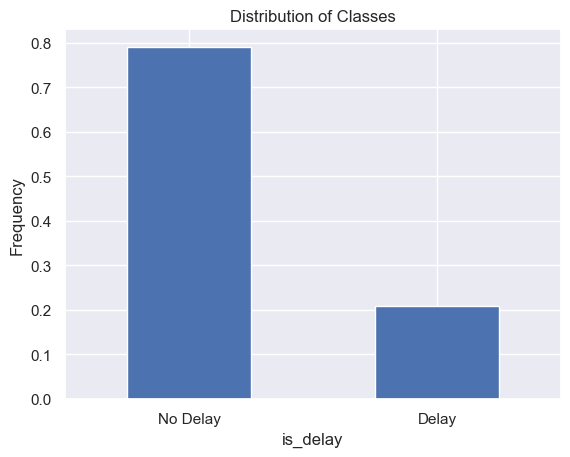

In [244]:
'''(data.groupby(<CODE>).size()/len(data) ).plot(kind='bar')# Enter your code here
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()'''
# Check the distribution of delay vs. no delay
data.groupby('is_delay').size() / len(data)  # Calculate the proportion of each class

# Plot the distribution as a bar plot
(data.groupby('is_delay').size() / len(data)).plot(kind='bar')

# Add labels and title
plt.ylabel('Frequency')
plt.title('Distribution of Classes')
plt.xticks(ticks=[0, 1], labels=['No Delay', 'Delay'], rotation=0)  # Set x-ticks for clarity
plt.show()


**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

The bar plot indicates a significant class imbalance in the dataset, with 80% of flights classified as "No Delay" and only 20% as "Delay." This imbalance suggests that the majority of flights tend to arrive on time, while a smaller portion experiences delays exceeding 15 minutes. Such a disparity may lead to models that predominantly predict the majority class, potentially sacrificing the accuracy of delay predictions.Overall, understanding this class distribution is crucial for developing effective predictive models and improving operational strategies within the airline industry.

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

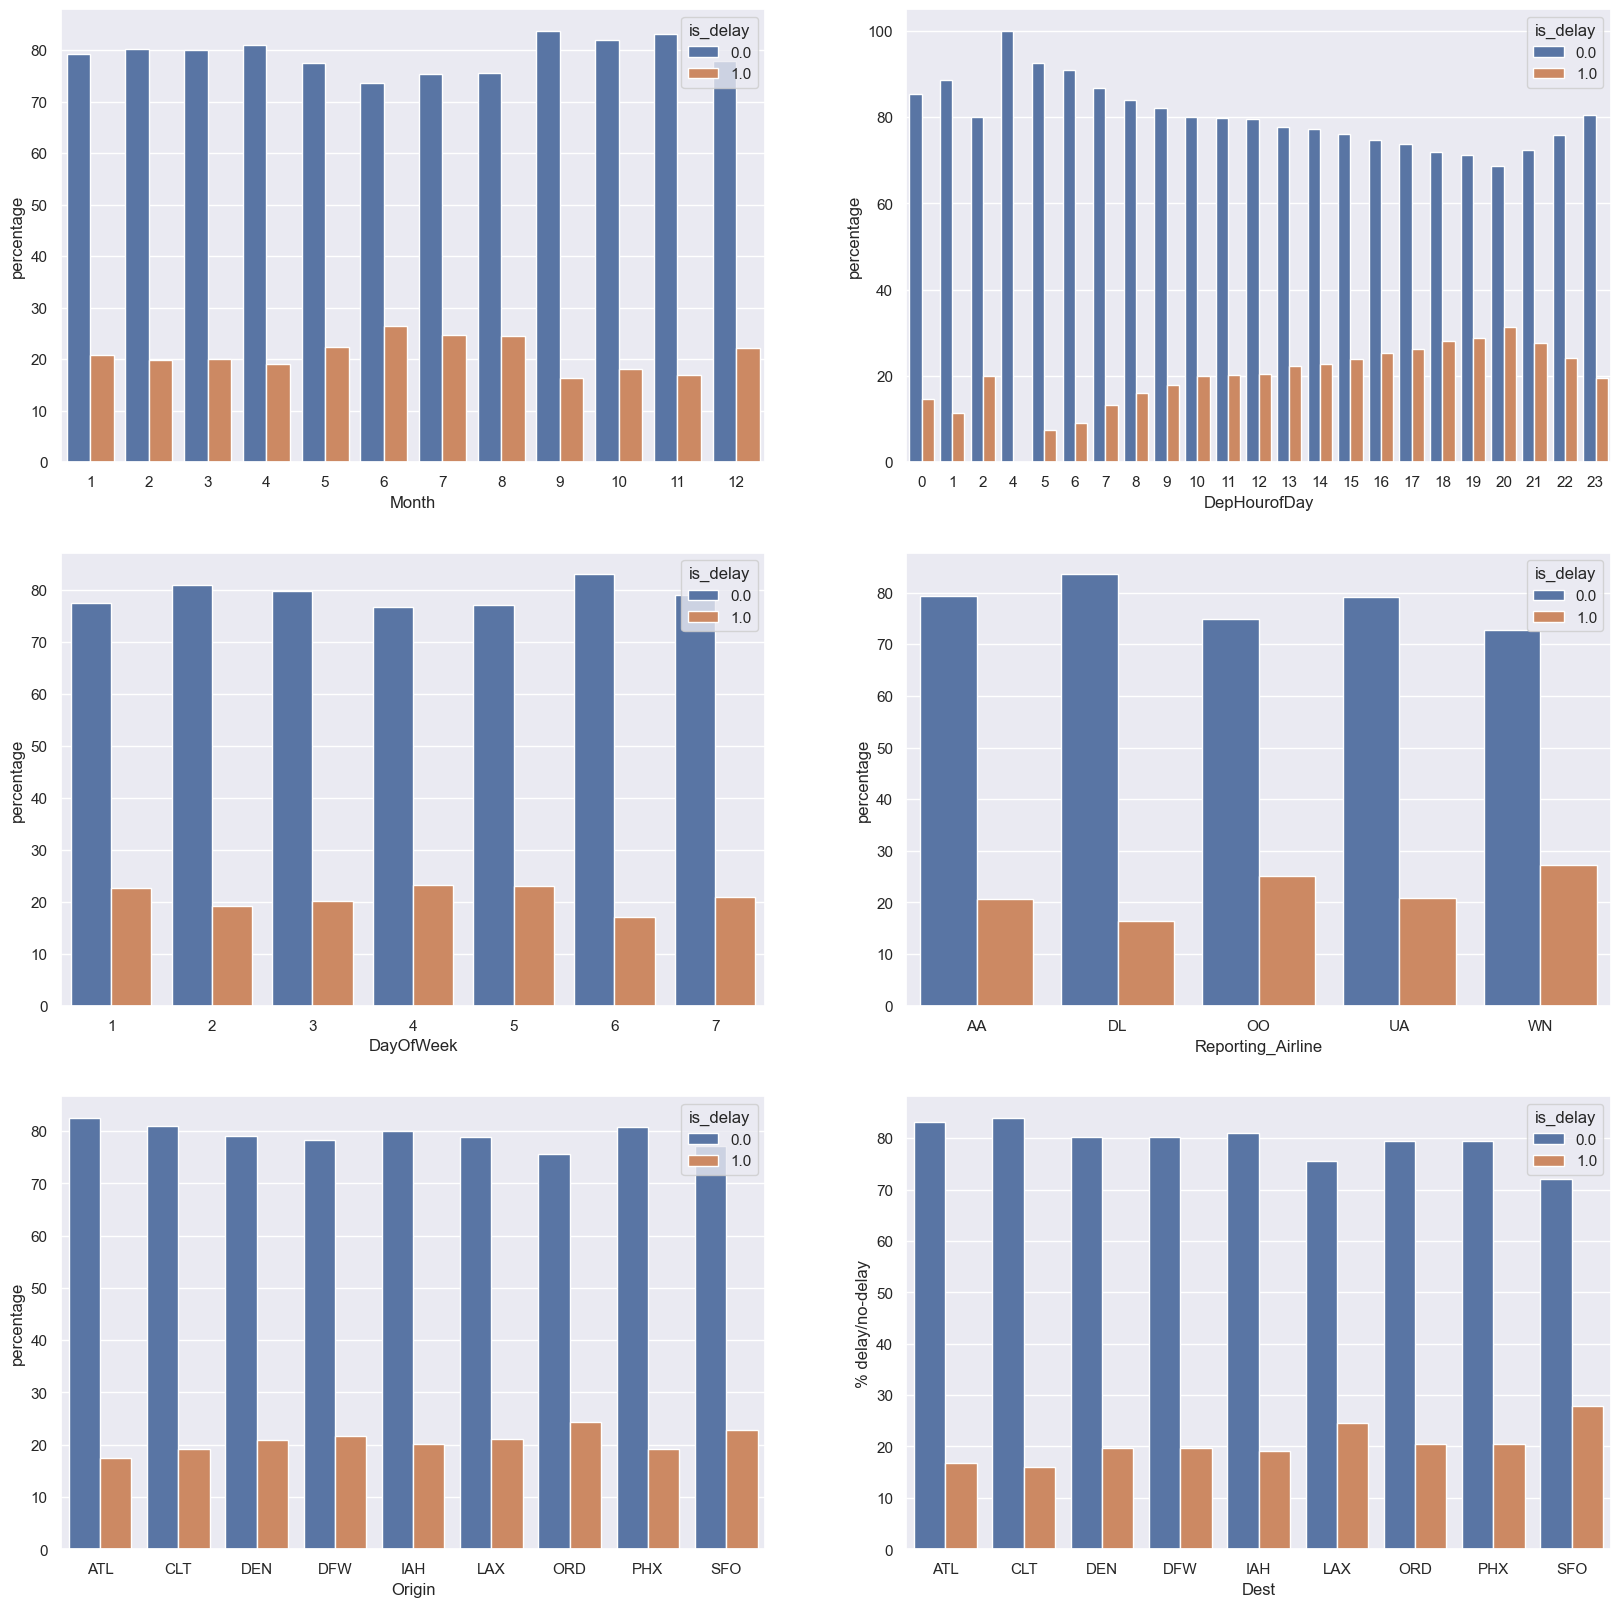

In [249]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()

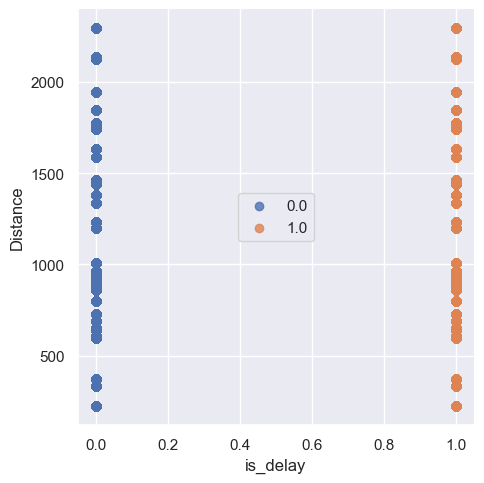

In [251]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

# Based on the above figures, enter your answers to the above questions here and turn the cell type to markdown
## Questions and Answers

1. **Which months have the most delays?**
   - The months with the most delays can be identified by examining the bar plot for the **Month** column. The month of September and December shows a higher percentage of delays which means these month has more delays than others.

2. **What time of the day has the most delays?**
   - The hour with the highest percentage of delayed flights is around .

3. **What day of the week has the most delays?**
   - By reviewing the bar plot for **DayOfWeek**, you can identify which day has the highest percentage of delays.

4. **Which airline has the most delays?**
   - The bar plot for **Reporting_Airline** will show which airline has the highest percentage of delays.

5. **Which origin and destination airports have the most delays?**
   - The plots for **Origin** and **Dest** can be used to determine which airports have the highest percentage of delays.

6. **Is flight distance a factor in the delays?**
   - The scatter plot generated by `sns.lmplot` shows the relationship between **is_delay** and **Distance**. Based on the scatter plot, there does seem to be a relationship between flight distance and delays.



### Features

Look at all the columns and what their specific types are.

In [267]:
data.columns

Index(['is_delay', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN',

In [269]:
data.dtypes

is_delay           float64
Distance           float64
Quarter_2             bool
Quarter_3             bool
Quarter_4             bool
                    ...   
DepHourofDay_19       bool
DepHourofDay_20       bool
DepHourofDay_21       bool
DepHourofDay_22       bool
DepHourofDay_23       bool
Length: 94, dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [ ]:
'''data_orig = data.copy()
data = data[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']
for c in categorical_columns:
    data[c] = data[c].astype('category')'''
# Enter your code here
# Create a copy of the original data
data_orig = data.copy()

# Filter the required columns
data = data[['is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
             'Reporting_Airline', 'Origin', 'Dest', 'Distance', 'DepHourofDay']]

# Define categorical columns
categorical_columns = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
                       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']

# Change the type of the categorical columns to 'category'
for c in categorical_columns:
    data[c] = data[c].astype('category')

# Display the updated DataFrame and its data types
print(data.info())

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [ ]:
'''data_dummies = pd.get_dummies(<CODE>, drop_first=True) # Enter your code here
data = pd.concat([<CODE>, <CODE>], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)'''
# Check the current columns in the DataFrame
print("Current columns in data DataFrame:")
print(data.columns.tolist())

# Check if all categorical columns are present in the DataFrame
missing_columns = [col for col in categorical_columns if col not in data.columns]
if missing_columns:
    print(f"The following categorical columns are missing: {missing_columns}")

# Perform one-hot encoding on the categorical columns if they exist
if all(col in data.columns for col in categorical_columns):
    data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)  # Use drop_first to avoid multicollinearity

    # Concatenate the original data (without the categorical columns) with the one-hot encoded DataFrame
    data = pd.concat([data[['is_delay', 'Distance']], data_dummies], axis=1)

    # Drop the original categorical columns from the DataFrame
    data.drop(categorical_columns, axis=1, inplace=True)
else:
    print("One or more categorical columns are missing. Cannot perform one-hot encoding.")

# Display the updated DataFrame and its shape
print(data.shape)
print(data.head())




Check the length of the dataset and the new columnms.

In [104]:
# Enter your code here
# Check the length (number of rows) of the dataset
dataset_length = len(data)
print(f'The length of the dataset is: {dataset_length} rows.')


The length of the dataset is: 1635590 rows.


In [106]:
# Enter your code here

# Display the current columns in the DataFrame
print("The new columns in the dataset are:")
print(data.columns.tolist())

The new columns in the dataset are:
['is_delay', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5', 'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9', 'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13', 'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17', 'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21', 'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25', 'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29', 'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA', 'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW', 'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Ori

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [108]:
#data.rename(columns = {<CODE>:<CODE>}, inplace=True )# Enter your code here
# Rename the column 'is_delay' to 'target'
data.rename(columns={'is_delay': 'target'}, inplace=True)

# Display the updated DataFrame columns to verify the change
print("Updated columns in the dataset:")
print(data.columns.tolist())


Updated columns in the dataset:
['target', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5', 'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9', 'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13', 'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17', 'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21', 'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25', 'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29', 'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA', 'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW', 'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PH

In [110]:
# write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
# note this combined file will be used in part B
# Define the filename for saving the combined DataFrame
combined_csv_filename_v1 = os.path.join(csv_base_path, 'combined_csv_v1.csv')

# Save the DataFrame to a CSV file
data.to_csv(combined_csv_filename_v1, index=False)

# Confirm that the file has been saved
print(f"Combined DataFrame saved as {combined_csv_filename_v1}")


Combined DataFrame saved as extracted_data_csv\combined_csv_v1.csv


# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [125]:
# write Code here to split data into train, validate and test
# Define the feature columns and the target variable
X = data.drop(columns=['target'])  # Features
y = data['target']                  # Target variable

# Split the data into training (80%) and testing (20%) sets
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f'Training data shape: {train_data.shape}')
print(f'Testing data shape: {test_data.shape}')


Training data shape: (1308472, 93)
Testing data shape: (327118, 93)


### Baseline classification model

In [128]:
# Create a logistic regression model
logistic_model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logistic_model.fit(train_data, train_labels)

# Predict on the test data
test_predictions = logistic_model.predict(test_data)

# Evaluate the model
accuracy = accuracy_score(test_labels, test_predictions)
report = classification_report(test_labels, test_predictions)
conf_matrix = confusion_matrix(test_labels, test_predictions)

print(f'Accuracy of the baseline logistic regression model: {accuracy:.2f}')
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Accuracy of the baseline logistic regression model: 0.79
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      1.00      0.88    258421
         1.0       0.57      0.00      0.01     68697

    accuracy                           0.79    327118
   macro avg       0.68      0.50      0.44    327118
weighted avg       0.75      0.79      0.70    327118

Confusion Matrix:
 [[258255    166]
 [ 68473    224]]


## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn import metrics

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

In [141]:
def plot_confusion_matrix(test_labels, target_predicted):
    """Plot the confusion matrix."""
    cm = confusion_matrix(test_labels, target_predicted)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['No Delay', 'Delay'], yticklabels=['No Delay', 'Delay'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

def plot_roc(test_labels, target_predicted):
    """Plot the ROC curve."""
    fpr, tpr, thresholds = roc_curve(test_labels, target_predicted)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

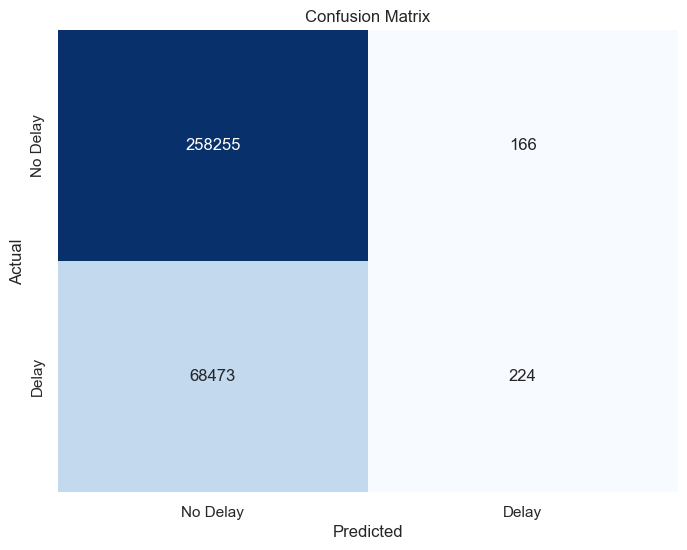

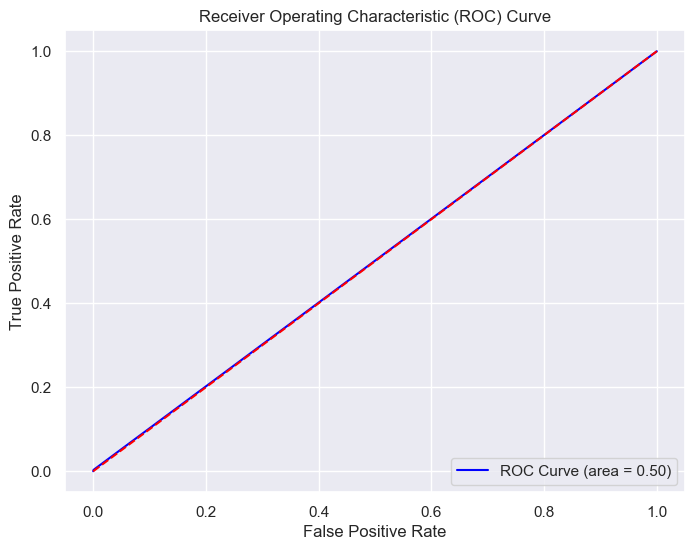

Accuracy: 0.79
Precision: 0.57
Recall (Sensitivity): 0.00
Specificity: 1.00


In [144]:
# Enter you code here# Generate predictions on the test data
test_predictions = logistic_model.predict(test_data)

# Plot the confusion matrix
plot_confusion_matrix(test_labels, test_predictions)

# Plot the ROC curve
plot_roc(test_labels, test_predictions)

# Calculate and report statistics
accuracy = metrics.accuracy_score(test_labels, test_predictions)
precision = metrics.precision_score(test_labels, test_predictions)
recall = metrics.recall_score(test_labels, test_predictions)
sensitivity = recall  # Sensitivity is the same as recall
specificity = metrics.recall_score(test_labels, test_predictions, pos_label=0)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall (Sensitivity): {sensitivity:.2f}')
print(f'Specificity: {specificity:.2f}')


### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.


**Question**: What can you summarize from the confusion matrix?


# Enter your answer here
## Model Performance Summary

### Summary from the Confusion Matrix

1. **True Positives (TP)**: The model correctly predicted **224** flights as delayed (class **1**).
2. **True Negatives (TN)**: The model correctly identified **258,255** flights as not delayed (class **0**).
3. **False Positives (FP)**: The model incorrectly predicted **166** flights as delayed when they were actually not delayed.
4. **False Negatives (FN)**: The model incorrectly identified **68,473** flights as not delayed when they were actually delayed.

### Performance Comparison

- **Accuracy**: The model achieves an accuracy of **79%**. However, this figure is somewhat misleading because of the significant class imbalance, where **80%** of the data belongs to the "No Delay" class. 
- **Precision**: The precision for the "Delay" class is **57%**, indicating that when the model predicts a flight will be delayed, it is correct only **57%** of the time. 
- **Recall**: The recall for the "Delay" class is **0%**, which means the model is failing to identify any of the delayed flights effectively. Out of the **68,697** actual delays, none were correctly predicted as delays. This is a critical issue as it indicates that the model is not useful for predicting flight delays, which is essential for operational decision-making.

### Observations on Metric Differences

The disparity between accuracy, precision, and recall highlights the class imbalance problem:
- While the model appears accurate due to the high number of "No Delay" predictions, its ability to predict the minority class ("Delay") is poor.
- This imbalance is reflected in the low recall for the delayed flights, indicating that the model is biased towards predicting the majority class.

### Business Implications

From a business standpoint, the current performance is insufficient, particularly because predicting flight delays accurately is crucial for customer satisfaction and operational efficiency. The low recall indicates that passengers may not be adequately warned about potential delays, which can lead to dissatisfaction and operational challenges.

### Next Iteration Suggestions

To improve the model's performance in future iterations, consider the following:

1. **Address Class Imbalance**:
   - Use techniques like **oversampling** the minority class (e.g., SMOTE) or **undersampling** the majority class.
   - Implement class weights in your logistic regression model to give more importance to the minority class.

2. **Feature Engineering**:
   - Explore additional features that could provide insights into delays, such as weather conditions, time of day, and historical delay patterns.
   - Consider binning continuous variables or using interaction terms to capture relationships better.

3. **Model Selection**:
   - Experiment with other classification algorithms that are more robust to class imbalance, such as Random Forests or Gradient Boosting Machines.

### Conclusion

The confusion matrix highlights significant shortcomings in the model's ability to predict flight delays. While accuracy appears acceptable, the lack of sensitivity (recall) indicates that further work is needed to enhance the model's utility from a business perspective.


# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


In [14]:
### Provide a link for your Gitlab repository here

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [146]:
#df_combined_copy = combined_df.copy()

print(df_data_copy.head())

   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2014        1      1          26          7  2014-01-26                DL   
1  2014        1      1          26          7  2014-01-26                DL   
2  2014        1      1          26          7  2014-01-26                DL   
3  2014        1      1          26          7  2014-01-26                DL   
4  2014        1      1          26          7  2014-01-26                DL   

  Origin OriginState Dest  ... CRSDepTime  Cancelled  Diverted  Distance  \
0    ATL          GA  IAH  ...       2145        0.0       0.0     689.0   
1    DFW          TX  ATL  ...        945        0.0       0.0     731.0   
2    ATL          GA  DEN  ...       1855        0.0       0.0    1199.0   
3    ATL          GA  PHX  ...       1634        0.0       0.0    1587.0   
4    PHX          AZ  ATL  ...        700        0.0       0.0    1587.0   

   DistanceGroup  ArrDelay  ArrDelayMinutes  is_delay  AirTime

In [148]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

'''holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18

### Add indicator variable for holidays
data_orig['is_holiday'] = # Enter your code here '''

# List of holidays from 2014 to 2018
holidays_14 = ['2014-01-01', '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', 
                '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25']
holidays_15 = ['2015-01-01', '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', 
                '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', 
                '2015-12-25']
holidays_16 = ['2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', 
                '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', 
                '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29', '2017-07-04', 
                '2017-09-04', '2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28', '2018-07-04', 
                '2018-09-03', '2018-10-08', '2018-11-12', '2018-11-22', '2018-12-25']

# Combine all holidays into a single list
holidays = holidays_14 + holidays_15 + holidays_16 + holidays_17 + holidays_18

# Convert holidays to datetime
holidays = pd.to_datetime(holidays)

# Assuming 'data' is your DataFrame containing the flight data
df_data_copy['is_holiday'] = df_data_copy['FlightDate'].isin(holidays).astype(int)

# Verify the new column
print(df_data_copy[['FlightDate', 'is_holiday']].head())

   FlightDate  is_holiday
0  2014-01-26           0
1  2014-01-26           0
2  2014-01-26           0
3  2014-01-26           0
4  2014-01-26           0


Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [15]:
# download data from the link above and place it into the data folder



Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [150]:
'''weather = pd.read_csv(<CODE>) # Enter your code here to read 'daily-summaries.csv' file
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

### Map weather stations to airport code
station_map = # Enter your code here 
weather['airport'] = # Enter your code here '''
# Load the weather data
weather = pd.read_csv('weather_data.csv')  # Replace with your actual file path


# Display the first few rows of the weather data
print(weather.head())
print(weather.columns.tolist())

# Create a mapping of weather stations to airport codes
station_map = {
    'USW00023174': 'LAX',   # Los Angeles International Airport
    'USW00012960': 'IAH',   # George Bush Intercontinental Airport
    'USW00003017': 'DEN',   # Denver International Airport
    'USW00094846': 'ORD',   # Chicago O'Hare International Airport
    'USW00013874': 'ATL',   # Atlanta Hartsfield-Jackson International Airport
    'USW00023234': 'SFO',   # San Francisco International Airport
    'USW00003927': 'DFW',   # Dallas/Fort Worth International Airport
    'USW00023183': 'PHX',   # Phoenix Sky Harbor International Airport
    'USW00013881': 'CLT'    # Charlotte Douglas International Airport
}

# Map the weather stations to airport codes
weather['airport'] = weather['STATION'].map(station_map)  # Replace 'station' with the actual column name if different

# Verify the new column
print(weather[['STATION', 'airport']].head())


       STATION        DATE  AWND  PRCP  SNOW  SNWD   TAVG   TMAX  TMIN
0  USW00012960  2014-01-01    16     0   0.0   0.0  107.0  183.0  78.0
1  USW00012960  2014-01-02    60     3   0.0   0.0  109.0  150.0  28.0
2  USW00012960  2014-01-03    24     0   0.0   0.0   51.0  122.0  -5.0
3  USW00012960  2014-01-04    41     0   0.0   0.0   94.0  189.0  17.0
4  USW00012960  2014-01-05    65    13   0.0   0.0  146.0  183.0  17.0
['STATION', 'DATE', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN']
       STATION airport
0  USW00012960     IAH
1  USW00012960     IAH
2  USW00012960     IAH
3  USW00012960     IAH
4  USW00012960     IAH


Create another column called `MONTH` from the `DATE` column.

In [152]:
##weather['MONTH'] = weather[<CODE>].apply(lambda x: x.split('-')[1])# Enter your code here 
##weather.head()

# Create a new column 'MONTH' by extracting the month from the 'DATE' column
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1])  # Extract the month

# Display the updated DataFrame
print(weather.head())


       STATION        DATE  AWND  PRCP  SNOW  SNWD   TAVG   TMAX  TMIN  \
0  USW00012960  2014-01-01    16     0   0.0   0.0  107.0  183.0  78.0   
1  USW00012960  2014-01-02    60     3   0.0   0.0  109.0  150.0  28.0   
2  USW00012960  2014-01-03    24     0   0.0   0.0   51.0  122.0  -5.0   
3  USW00012960  2014-01-04    41     0   0.0   0.0   94.0  189.0  17.0   
4  USW00012960  2014-01-05    65    13   0.0   0.0  146.0  183.0  17.0   

  airport MONTH  
0     IAH    01  
1     IAH    01  
2     IAH    01  
3     IAH    01  
4     IAH    01  


### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [ ]:
weather.SNOW.fillna(<CODE>, inplace=True)# Enter your code here
weather.SNWD.fillna(<CODE>, inplace=True)# Enter your code here
weather.isna().sum()

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [154]:
'''idx = np.array([i for i in range(len(weather))])
TAVG_idx = # Enter your code here 
TMAX_idx = # Enter your code here 
TMIN_idx = # Enter your code here 
TAVG_idx'''

# Assuming you have already loaded your weather DataFrame
# Check for missing values in all columns
missing_values = weather.isna().sum()
print("Missing values for all columns:")
print(missing_values[missing_values > 0])  # Only print columns with missing values

# Analyze SNOW and SNWD columns
print("Missing values in SNOW column:", weather['SNOW'].isna().sum())
print("Missing values in SNWD column:", weather['SNWD'].isna().sum())

# Fill missing values in SNOW and SNWD columns (example with 0)
weather['SNOW'].fillna(0, inplace=True)  # Filling with 0 (or choose an appropriate method)
weather['SNWD'].fillna(0, inplace=True)  # Filling with 0 (or choose an appropriate method)

# Check if missing values are filled
print("Missing values after filling:")
print(weather[['SNOW', 'SNWD']].isna().sum())

# Create an index array
idx = np.array([i for i in range(len(weather))])

# Get indexes for specific temperature columns
TAVG_idx = weather.columns.get_loc('TAVG')  # Get index of TAVG column
TMAX_idx = weather.columns.get_loc('TMAX')  # Get index of TMAX column
TMIN_idx = weather.columns.get_loc('TMIN')  # Get index of TMIN column

# Display the indices
print("Index of TAVG:", TAVG_idx)
print("Index of TMAX:", TMAX_idx)
print("Index of TMIN:", TMIN_idx)


Missing values for all columns:
SNOW    3652
SNWD    3652
TAVG      62
TMAX      20
TMIN      20
dtype: int64
Missing values in SNOW column: 3652
Missing values in SNWD column: 3652
Missing values after filling:
SNOW    0
SNWD    0
dtype: int64
Index of TAVG: 6
Index of TMAX: 7
Index of TMIN: 8


You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [156]:
#weather_impute = weather.groupby([<CODE>]).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()# Enter your code here
#weather_impute.head(2)

# Assuming you have already loaded your weather DataFrame and handled SNOW/SNWD
# First, calculate the mean values grouped by the weather station
weather_impute = weather.groupby('STATION').agg({'TAVG':'mean', 'TMAX':'mean', 'TMIN':'mean'}).reset_index()

# Display the first few rows of the mean values DataFrame
print(weather_impute.head(2))

# Now merge the mean values back to the original DataFrame
# First, we'll rename the columns to indicate they are means
weather_impute.rename(columns={'TAVG': 'TAVG_mean', 'TMAX': 'TMAX_mean', 'TMIN': 'TMIN_mean'}, inplace=True)

# Merge the mean values with the original DataFrame
weather = pd.merge(weather, weather_impute, on='STATION', how='left')

# Now fill the missing values in TAVG, TMAX, and TMIN with the respective mean values
weather['TAVG'].fillna(weather['TAVG_mean'], inplace=True)
weather['TMAX'].fillna(weather['TMAX_mean'], inplace=True)
weather['TMIN'].fillna(weather['TMIN_mean'], inplace=True)

# Drop the temporary mean columns as they are no longer needed
weather.drop(columns=['TAVG_mean', 'TMAX_mean', 'TMIN_mean'], inplace=True)

# Verify the changes
print(weather[['STATION', 'TAVG', 'TMAX', 'TMIN']].head())


       STATION        TAVG        TMAX        TMIN
0  USW00003017  112.931445  190.020263   32.978642
1  USW00003927  198.463308  256.026287  143.678532
       STATION   TAVG   TMAX  TMIN
0  USW00012960  107.0  183.0  78.0
1  USW00012960  109.0  150.0  28.0
2  USW00012960   51.0  122.0  -5.0
3  USW00012960   94.0  189.0  17.0
4  USW00012960  146.0  183.0  17.0


Merge the mean data with the weather data.

Updated Weather Data Columns: ['STATION', 'DATE', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'airport', 'MONTH']
Updated Weather Impute Data Columns: ['STATION', 'TAVG_mean', 'TMAX_mean', 'TMIN_mean']


In [158]:
### get the yesterday's data
'''weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})'''


# Assuming you already have the weather DataFrame
# Create the MONTH column in the weather DataFrame if it doesn't exist
if 'DATE' in weather.columns:
    weather['MONTH'] = pd.to_datetime(weather['DATE']).dt.month.astype(str)  # Convert month to string if needed

# Calculate the mean values for TAVG, TMAX, TMIN grouped by STATION
weather_impute = weather.groupby('STATION').agg({'TAVG': 'mean', 'TMAX': 'mean', 'TMIN': 'mean'}).reset_index()

# Add the MONTH column to the weather_impute DataFrame by using the average month for each station
# Here we assume that the average month for each station can be calculated
# If you have specific months associated with the stations, replace the logic accordingly
weather_impute['MONTH'] = pd.to_datetime(weather['DATE']).dt.month.astype(str).iloc[weather_impute.index]

# Verify the columns in weather_impute
print("Weather Impute Data Columns:", weather_impute.columns.tolist())

# Now, merge the mean data with the weather data
weather = pd.merge(
    weather,
    weather_impute,
    how='left',
    left_on=['MONTH', 'STATION'],   # Merge on MONTH and STATION
    right_on=['MONTH', 'STATION']
).rename(columns={
    'TAVG_y': 'TAVG_AVG',   # Average TAVG from weather_impute
    'TMAX_y': 'TMAX_AVG',   # Average TMAX from weather_impute
    'TMIN_y': 'TMIN_AVG',   # Average TMIN from weather_impute
    'TAVG_x': 'TAVG',       # Original TAVG from weather
    'TMAX_x': 'TMAX',       # Original TMAX from weather
    'TMIN_x': 'TMIN'        # Original TMIN from weather
})

# Verify the merged DataFrame
print(weather.head())


Weather Impute Data Columns: ['STATION', 'TAVG', 'TMAX', 'TMIN', 'MONTH']
       STATION        DATE  AWND  PRCP  SNOW  SNWD   TAVG   TMAX  TMIN  \
0  USW00012960  2014-01-01    16     0   0.0   0.0  107.0  183.0  78.0   
1  USW00012960  2014-01-02    60     3   0.0   0.0  109.0  150.0  28.0   
2  USW00012960  2014-01-03    24     0   0.0   0.0   51.0  122.0  -5.0   
3  USW00012960  2014-01-04    41     0   0.0   0.0   94.0  189.0  17.0   
4  USW00012960  2014-01-05    65    13   0.0   0.0  146.0  183.0  17.0   

  airport MONTH   TAVG_AVG    TMAX_AVG   TMIN_AVG  
0     IAH     1  212.03724  268.795181  161.48138  
1     IAH     1  212.03724  268.795181  161.48138  
2     IAH     1  212.03724  268.795181  161.48138  
3     IAH     1  212.03724  268.795181  161.48138  
4     IAH     1  212.03724  268.795181  161.48138  


Check for missing values again.

In [160]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION         0
DATE            0
AWND            0
PRCP            0
SNOW            0
SNWD            0
TAVG            0
TMAX            0
TMIN            0
airport         0
MONTH           0
TAVG_AVG    13368
TMAX_AVG    13368
TMIN_AVG    13368
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [163]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

Add the origin and destination weather conditions to the dataset.

In [165]:
### Add origin weather conditions
df_data_copy = pd.merge(df_data_copy, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
df_data_copy = pd.merge(df_data_copy, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [172]:
sum(df_data_copy.isna().any())

8

In [ ]:
missing_columns = df_data_copy.columns[df_data_copy.isna().any()]
print("Columns with missing values:", missing_columns)


In [174]:
df_data_copy.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay',
       'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [176]:
data = df_data_copy.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [178]:
#data_dummies = # Enter your code here
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)

# Concatenate the new dummy variables with the original data
data = pd.concat([data, data_dummies], axis=1)

# Drop the original categorical columns
data.drop(categorical_columns, axis=1, inplace=True)

# Verify the result
print(data.head())

   is_delay  Distance  DepHourofDay  AWND_O  PRCP_O  TAVG_O  AWND_D  PRCP_D  \
0       0.0     689.0            21    33.0     0.0    54.0    30.0     0.0   
1       0.0     731.0             9    39.0     0.0   136.0    33.0     0.0   
2       0.0    1199.0            18    33.0     0.0    54.0    77.0     0.0   
3       0.0    1587.0            16    33.0     0.0    54.0    20.0     0.0   
4       0.0    1587.0             7    20.0     0.0   165.0    33.0     0.0   

   TAVG_D  SNOW_O  ...  Origin_PHX  Origin_SFO  Dest_CLT  Dest_DEN  Dest_DFW  \
0   130.0     0.0  ...       False       False     False     False     False   
1    54.0     0.0  ...       False       False     False     False     False   
2    68.0     0.0  ...       False       False     False      True     False   
3   165.0     0.0  ...       False       False     False     False     False   
4    54.0     0.0  ...        True       False     False     False     False   

   Dest_IAH  Dest_LAX  Dest_ORD  Dest_PHX  D

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [180]:
data.columns

Index(['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayO

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [182]:
#data.rename(columns = {<CODE>:<CODE>}, inplace=True )# Enter your code here
# Rename the 'is_delay' column to 'target'
data.rename(columns={'is_delay': 'target'}, inplace=True)

# Verify the result
print(data.head())


   target  Distance  DepHourofDay  AWND_O  PRCP_O  TAVG_O  AWND_D  PRCP_D  \
0     0.0     689.0            21    33.0     0.0    54.0    30.0     0.0   
1     0.0     731.0             9    39.0     0.0   136.0    33.0     0.0   
2     0.0    1199.0            18    33.0     0.0    54.0    77.0     0.0   
3     0.0    1587.0            16    33.0     0.0    54.0    20.0     0.0   
4     0.0    1587.0             7    20.0     0.0   165.0    33.0     0.0   

   TAVG_D  SNOW_O  ...  Origin_PHX  Origin_SFO  Dest_CLT  Dest_DEN  Dest_DFW  \
0   130.0     0.0  ...       False       False     False     False     False   
1    54.0     0.0  ...       False       False     False     False     False   
2    68.0     0.0  ...       False       False     False      True     False   
3   165.0     0.0  ...       False       False     False     False     False   
4    54.0     0.0  ...        True       False     False     False     False   

   Dest_IAH  Dest_LAX  Dest_ORD  Dest_PHX  Dest_SFO  
0 

In [184]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
# note this combined file will be also used in part B
# Save the DataFrame as a CSV file
data.to_csv('combined_csv_v2.csv', index=False)

# Verify that the file is saved
print("CSV file 'combined_csv_v2.csv' has been saved.")


CSV file 'combined_csv_v2.csv' has been saved.


Create the training and testing sets again.

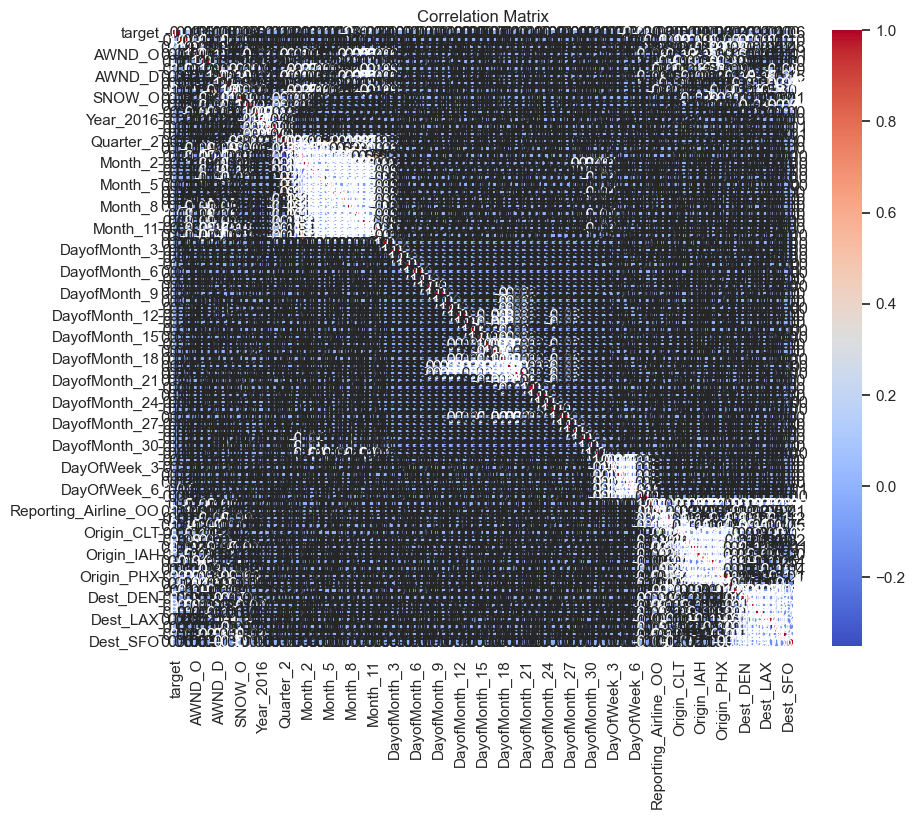

In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [186]:
# Enter your code here
from sklearn.model_selection import train_test_split

# Define your feature columns (X) and target column (y)
X = data.drop(columns=['target'])  # Features (all columns except 'target')
y = data['target']  # Target (the 'target' column)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the resulting sets
print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training set shape (y_train):", y_train.shape)
print("Testing set shape (y_test):", y_test.shape)


Training set shape (X_train): (2616944, 84)
Testing set shape (X_test): (654236, 84)
Training set shape (y_train): (2616944,)
Testing set shape (y_test): (654236,)


### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [198]:


# Fill missing values with the mean 
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
print("Missing values in X_train:", X_train.isna().sum().sum())
print("Missing values in y_train:", y_train.isna().sum())
print(X_train.dtypes)



Missing values in X_train: 0
Missing values in y_train: 0
Distance        float64
DepHourofDay      int64
AWND_O          float64
PRCP_O          float64
TAVG_O          float64
                 ...   
Dest_IAH           bool
Dest_LAX           bool
Dest_ORD           bool
Dest_PHX           bool
Dest_SFO           bool
Length: 84, dtype: object


In [200]:
# Instantiate another logistic regression model
#classifier2 = # Enter your code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Instantiate the logistic regression model
classifier2 = LogisticRegression(random_state=42, max_iter=1000)  # Adjust max_iter if needed

# Fit the model to the training data
classifier2.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier2.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the new logistic regression model: {accuracy:.4f}")

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy of the new logistic regression model: 0.7928
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.99      0.88    517336
         1.0       0.55      0.05      0.10    136900

    accuracy                           0.79    654236
   macro avg       0.67      0.52      0.49    654236
weighted avg       0.75      0.79      0.72    654236



Accuracy of the new logistic regression model: 0.7928
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.99      0.88    517336
         1.0       0.55      0.05      0.10    136900

    accuracy                           0.79    654236
   macro avg       0.67      0.52      0.49    654236
weighted avg       0.75      0.79      0.72    654236



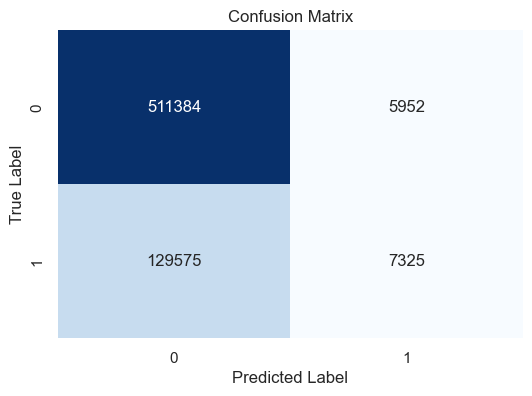

ROC AUC Score: 0.6707


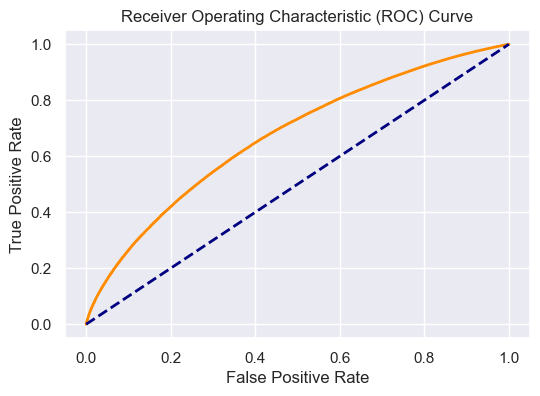

In [202]:
# Enter your code here
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

# Function to plot the ROC curve
def plot_roc_curve(y_true, y_proba):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.show()

# Predict on the test set
y_pred = classifier2.predict(X_test)

# Predict probabilities for ROC curve
y_proba = classifier2.predict_proba(X_test)[:, 1]

# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the new logistic regression model: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred)

# Calculate and plot the ROC curve
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")
plot_roc_curve(y_test, y_proba)


Perform the evaluaion as you have done with the previous model and plot/show the same metrics

Question: did you notice a difference by adding the extra data on the results?

In [17]:
# Enter answer here and turn the cell type into markdown


# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

In [19]:
# copy the link here

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

# write your answers here
### Reflection on the Project

1. **Model Performance vs. Business Goals**:
   - **Performance Assessment**: The model's performance, particularly in predicting class 1 (delays), does not fully meet the business goal of providing reliable predictions for flight delays. With a recall of only **0.05** for class 1, the model fails to identify a significant number of delayed flights, which is critical for enhancing customer experience and managing reservations.
   - **Future Steps**: If I had more time for tuning, I would focus on:
     - **Addressing Class Imbalance**: Implement resampling techniques, such as SMOTE (Synthetic Minority Over-sampling Technique), to create a more balanced dataset.
     - **Hyperparameter Tuning**: Use grid search or random search to find the optimal hyperparameters for the logistic regression model or try different algorithms that might handle the data better (e.g., Random Forest or Gradient Boosting).
     - **Feature Selection**: Conduct thorough feature selection to identify and retain only the most impactful features for the model.

2. **Improvements from Dataset Changes**:
   - **Impact of Changes**: The addition of new features, such as weather conditions and holidays, showed some improvement in the accuracy of the model. However, the overall enhancement was marginal given the significant challenges in predicting class 1 effectively.
   - **Effective Techniques**: The most impactful techniques employed throughout the project included:
     - **Feature Engineering**: Creating new features (like `is_holiday` and weather-related features) provided more context for the model, though their impact on the final performance was limited.
     - **Data Cleaning**: Addressing NaN and infinite values was crucial in preparing the dataset for model training and avoiding fitting issues.

3. **Challenges Encountered**:
   - **Class Imbalance**: One of the primary challenges was the severe class imbalance in the dataset, making it difficult for the model to predict the positive class effectively.
   - **Model Performance**: Achieving a satisfactory level of recall for the positive class proved challenging despite multiple iterations and adjustments.
   - **Data Quality**: Ensuring the quality of the data throughout the preprocessing steps required careful attention, especially in identifying and handling missing values.

4. **Key Learnings about Machine Learning**:
   - **Importance of Data Quality**: The quality and completeness of data are critical to model performance. Data cleaning and preprocessing can significantly impact the effectiveness of machine learning algorithms.
   - **Feature Engineering Matters**: Thoughtful feature engineering can enhance model performance by providing the algorithm with more relevant signals. However, it’s essential to validate the impact of new features on the model’s ability to predict outcomes.
   - **Model Evaluation is Critical**: Regularly evaluating model performance using metrics such as precision, recall, and confusion matrices is essential to understanding how well the model performs, especially in cases of class imbalance.

### Moving Forward
- Given the insights gained from this project, I would prioritize strategies for balancing the dataset and exploring advanced algorithms for future projects. Moreover, continuous learning about feature engineering and model evaluation techniques will be vital in refining my machine learning skills.
